# Productivity Growth

## Set up 

In [1]:
import pandas as pd
import numpy as np
from readabs import read_abs_series
from pathlib import Path

from plotting import clear_chart_dir, set_chart_dir, calc_growth, plot_growth, finalise_plot

In [2]:
# plotting constants
CHART_DIR = "./CHARTS/Productivity/"
Path(CHART_DIR).mkdir(parents=True, exist_ok=True)
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)
SHOW = False
FILE_TYPE = "png"

## Data capture and analysis

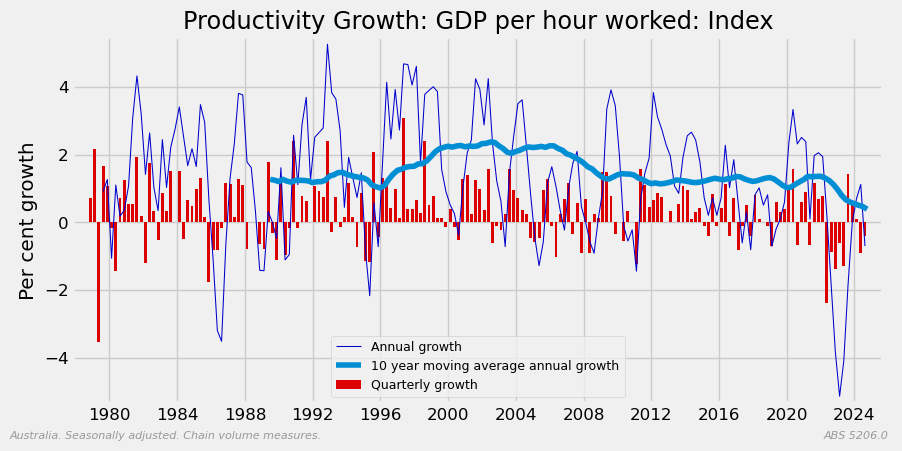

In [3]:
required = {
    "A2304192L" : {"cat": "5206.0", "seo": "5206001_Key_Aggregates", "label": "GDP per hour worked: Index"},
}

N_YEARS = 10
for series, ref in required.items():
    data, meta = read_abs_series(cat=ref["cat"], series_id=series, single_excel_only=ref["seo"])
    growth = calc_growth(data[data.columns[0]])
    ax = plot_growth(*growth)
    multi_year_ave = growth[0].rolling(window=N_YEARS*4).mean()
    ax.plot(multi_year_ave.index, multi_year_ave, label=f"{N_YEARS} year moving average annual growth")
    finalise_plot(
        ax,
        title=f'Productivity Growth: {ref["label"]}',
        ylabel="Per cent growth",
        lfooter="Australia. Seasonally adjusted. Chain volume measures. ",
        rfooter=f"ABS {ref['cat']} ",
        file_type=FILE_TYPE,
        zero_y=True,
        legend={"loc": "best", "fontsize": 9},
        show=True
    )


## Wrap up

In [4]:
%load_ext watermark
%watermark --python --machine --iversions --watermark

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.31.0

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 24.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 14
Architecture: 64bit

pandas : 2.2.3
readabs: 0.0.17
numpy  : 1.26.4

Watermark: 2.5.0



In [5]:
print("Done")

Done
